In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re


# Dataset #1

## Cleaning SimilarWeb traffic data

In [3]:
#import /Users/macbook/Thesis data scrapers/Newscraper/data/traffic_data.xlsx
df_traffic = pd.read_excel('/Users/macbook/Thesis data scrapers/Newscraper/data/traffic_data.xlsx')
df_traffic['urls'] = df_traffic['urls'].astype(str)

#replace all empty cells in website link with missing
df_traffic['urls'] = df_traffic['urls'].fillna('missing')
df_traffic.sample(5)
# Pivoteren van de DataFrame
pivot_df = df_traffic.pivot(index='urls', columns='order', values='visits')

#change the column names to month names
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
pivot_df.columns = [month_names[int(i)] if i in range(0, 12) else 'Unknown' for i in pivot_df.columns]

pivot_df.reset_index(inplace=True)

pivot_df.sample(5)
# unique urls in pivot_dfkl
pivot_df['urls'].nunique()
pivot_df['average visits'] = pivot_df.mean(axis=1)
pivot_df = pivot_df.fillna(0)
pivot_df['average visits'] = pivot_df['average visits'].astype(int)
average_visits_per_month = pivot_df.mean(axis=0)
average_visits_per_month_df = pd.DataFrame(average_visits_per_month, columns=['Average Visits'])
average_visits_per_month_df.index.name = 'Month'
average_visits_per_month_df.reset_index(inplace=True)


FileNotFoundError: [Errno 2] No such file or directory: '/Users/macbook/Thesis data scrapers/Newscraper/data/traffic_data.xlsx'

In [4]:
#load /Users/macbook/thesis/new/code/data/raw_data/traffic_data_cleaned.csv

df_traffic_cleaned = pd.read_csv('/Users/macbook/thesis/new/code/data/raw_data/traffic_data_cleaned.csv')

Index(['urls;unknown;jan;feb;mar;apr;may;jun;jul;aug;sep;average visits;last month with visitors'], dtype='object')

In [ ]:
#count the number of months with 0 visits
pivot_df = pivot_df.fillna(0)

# last month with visitors
def last_month_with_visitors(row):
    last_month = None
    for month in reversed(row.index):
        if row[month] != 0:
            last_month = month
            break
    return last_month

# calculate the last month with visitors
pivot_df['Last Month With Visitors'] = pivot_df.apply(last_month_with_visitors, axis=1)

# calculate the average until the last month with visitors
def average_until_last_month(row, last_month):
    if last_month is None:
        return None
    months = row.index[row.index < last_month]
    if not months.any():
        return None
    return row[months].mean()

pivot_df['Average Until Last Month'] = pivot_df.apply(lambda row: average_until_last_month(row, row['Last Month With Visitors']), axis=1)

# calculate the percentage increase
def percentage_increase(row):
    if pd.isna(row['Average Until Last Month']) or pd.isna(row['Last Month With Visitors']):
        return None
    last_month_visits = row[row['Last Month With Visitors']]
    avg_until_last = row['Average Until Last Month']
    return ((last_month_visits - avg_until_last) / avg_until_last) * 100

pivot_df['Percentage Increase'] = pivot_df.apply(percentage_increase, axis=1)

In [ ]:
#all lowercase column names
pivot_df.columns = pivot_df.columns.str.lower()
pivot_df.sample(5)

In [ ]:
#save pivot_df as csv
pivot_df.to_csv('/Users/macbook/Thesis data scrapers/Newscraper/data/traffic_data_cleaned.csv', sep=';', encoding='utf-8', index=False)

In [7]:
#read traffic data cleaned
df_traffic_cleaned = pd.read_csv('/Users/macbook/thesis/new/code/data/raw_data/traffic_data_cleaned.csv', sep=';')

In [8]:
df_traffic_cleaned.sample(5)

,urls,unknown,jan,feb,mar,apr,may,jun,jul,aug,sep,average visits,last month with visitors
3241,lab.sundaypyjamas.com,0.0,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,212.960280,0.000000,0.000000,23,average visits
577,astrai.co,0.0,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,urls
2040,exactbuyer.com,0.0,10294.4292,4545.470615,6275.411203,1678.788746,2625.149274,11340.809116,7674.849306,2678.496490,2085.854494,5466,average visits
2732,heero.ai,0.0,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2271.087745,252,average visits
1387,constructable.app,0.0,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,248.998036,12582.035658,13750.347147,2953,average visits


## Cleaning Product Hunt tool list

In [19]:
df_ph2 = pd.read_csv("/Users/macbook/thesis/product_hunt_general_info5.csv") 
df_ph = pd.read_csv("/Users/macbook/thesis/product_hunt_general_info4.csv") 

#concatenate the two dataframes
df_ph = pd.concat([df_ph, df_ph2], axis=0)


In [20]:
#drop duplicates
df_ph = df_ph.drop_duplicates()

# count duplicates
df_ph.duplicated().sum()

#drop duplicates
df_ph = df_ph.drop_duplicates()

df_ph = df_ph.drop(['followers_count', 'reviews_count', 'filled_stars_count'], axis=1)

#save dataframe to csv
df_ph.to_csv('product_hunt_general_info.csv', index=False)

# Using a regular expression to replace all non-alphanumeric characters with nothing ('')
df_ph['name_format'] = df_ph['product_name'].str.replace('[^a-zA-Z0-9]', '', regex=True)

# change all to lowercase in name_format
df_ph['name_format'] = df_ph['name_format'].str.lower()

In [21]:
df_ph.sample(15)

,product_name,product_url,product_image_url.,name_format
4089,sticker.ai - generate stickers with a.i.,/products/sticker-ai-generate-stickers-with-a-i,https://ph-files.imgix.net/9297df35-7c81-44a9-...,stickeraigeneratestickerswithai
464,Amazon,/products/amazon,https://ph-files.imgix.net/6b6b3991-2e69-47c2-...,amazon
1165,flowRL,/products/flowrl,https://ph-files.imgix.net/9297df35-7c81-44a9-...,flowrl
4581,ToolsPedia.io,/products/toolspedia-io,https://ph-files.imgix.net/0934b924-fd04-4c63-...,toolspediaio
2489,ImageToPromptAI,/products/imagetopromptai,https://ph-files.imgix.net/9297df35-7c81-44a9-...,imagetopromptai
3367,PhotoFairy,/products/photofairy,https://ph-files.imgix.net/31b10796-e90f-4b09-...,photofairy
5001,Askpot,/products/askpot,https://ph-files.imgix.net/c84f7c6a-20c7-43fe-...,askpot
3301,Notly - AI writing assistant for Notion,/products/notly-ai-writing-assistant-for-notion,https://ph-files.imgix.net/f8daeaa2-02dc-470f-...,notlyaiwritingassistantfornotion
58,Miro,/products/miro,https://ph-files.imgix.net/01cca4e0-cc5d-4b42-...,miro
1771,Brandity.ai,/products/brandity-ai,https://ph-files.imgix.net/37a8360d-73c6-48ff-...,brandityai


## Cleaning There's an AI for that tool list

In [11]:
#convert to df
df = pd.read_excel("/Users/macbook/thesis/new/code/data/raw_data/merged_data.xlsx")

#change only column names to lowercase
df.columns = df.columns.str.lower()

#make new column 'url_format' format URL should be always:’nametool’ DOT ’link’
df['url_format'] = df['url'].str.replace('https://', '').str.replace('http://', '').str.replace('www.', '').str.split('/').str[0]

# Using a regular expression to replace all non-alphanumeric characters with nothing ('')
df['name_format'] = df['name'].str.replace('[^a-zA-Z0-9]', '', regex=True)

# change all to lowercase in name_format
df['name_format'] = df['name_format'].str.lower()

#delete duplciates in url_format and keep latest one
df = df.drop_duplicates(subset='url_format', keep="last")

#give unique id to each row and call it tool_id
df['tool_id'] = df.index + 1

#put tool_id in front of the df
df = df.set_index('tool_id').reset_index()

In [23]:
#how many unique values for each column
df.nunique()

tool_id        7944
name           7918
task           2191
url            7944
price           863
saves           505
likes            30
stars            39
period           20
url_content    7909
url_format     7944
name_format    7882
dtype: int64

In [24]:
#look for similar the two dataframes on name_format
df_ph['name_format'].isin(df['name_format']).value_counts()

False    4118
True     2116
Name: name_format, dtype: int64

In [12]:
df.describe()

,tool_id,likes,stars
count,7944.000000,1139.000000,1838.000000
mean,4441.611531,2.474100,3.800218
std,2562.688578,10.258007,1.553527
min,1.000000,-4.000000,1.000000
25%,2230.500000,1.000000,3.000000
50%,4457.500000,1.000000,5.000000
75%,6627.250000,2.000000,5.000000
max,8866.000000,326.000000,5.000000


In [13]:
df.columns

Index(['tool_id', 'name', 'task', 'url', 'price', 'saves', 'likes', 'stars',
       'period', 'url_content', 'url_format', 'name_format'],
      dtype='object')

## Cleaning financial data

In [25]:
#function to find similar names in two dataframes
def financial_data():
    #read the csv file /Users/macbook/thesis/new/code/data/financial_data.csv
    df_financial = pd.read_csv("/Users/macbook/thesis/new/code/data/financial_data.csv", sep=';', encoding='utf-8')

    # all lowercase column names and add _ in spaces
    df_financial.columns = df_financial.columns.str.lower().str.replace(' ', '_')

    # # Using a regular expression to replace all non-alphanumeric characters with nothing ('')
    df_financial['tool_name'] = df_financial['organization_name'].str.replace('[^a-zA-Z0-9]', '', regex=True)

    #change the website link format to websitedomain + DOT + toplevel domain like df_ga['url_format'] = df_ga['website link'].str.replace('https://', '').str.replace('http://', '').str.replace('www.', '').str.split('/').str[0]
    df_financial['url_format'] = df_financial['website'].str.replace('https://', '').str.replace('http://', '').str.replace('www.', '').str.split('/').str[0]

    #delete duplicates in url_format and keep latest one
    df_financial = df_financial.drop_duplicates(subset='url_format', keep="last")

financial_data()

/var/folders/lz/910twyk903nb6sxfgz54bngc0000gn/T/ipykernel_47628/3916842649.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  df_financial['url_format'] = df_financial['website'].str.replace('https://', '').str.replace('http://', '').str.replace('www.', '').str.split('/').str[0]


In [27]:
#df_financial url_format to string
df_financial['url_format'] = df_financial['url_format'].astype(str)

In [28]:
#read all data from data folder
traffic = pd.read_csv("/Users/macbook/thesis/new/code/data/traffic_data_cleaned.csv", sep=';', encoding='utf-8')
gartner = pd.read_csv("/Users/macbook/thesis/new/code/data/general_info_ga_cleaned.csv", sep=';', encoding='utf-8')


In [29]:

#change column name urls to url_format
traffic.rename(columns={'urls': 'url_format'}, inplace=True)

## Cleaning gartner list

In [3]:
# read general_info_ga_cleaned.csv
df_ga = pd.read_csv("/Users/macbook/thesis/new/code/data/general_info_ga_cleaned.csv", sep=';', encoding='utf-8')

df_ga['url_format'].is_unique

# what is not unique in url_format
df_ga['url_format'].value_counts()

# delete one of rows in the double url_format
df_ga = df_ga.drop_duplicates(subset='url_format', keep="last")

# print all double url_format
df_ga[df_ga['url_format'].isin(df_ga['url_format'][df_ga['url_format'].duplicated()])].sort_values(by=['url_format'])

,s.n.,tool name,location,year founded,website link,product description,business unit,vertical,application type,use case,type of output modality,type of data origin,freemium,fuzzy_match_score,url_format


In [6]:
# save df_ga to csv
df_ga.to_csv('general_info_ga_cleaned.csv', index=False)

# Combining datasets

In [31]:
# join traffic and gartner dataframes on url_format and if there is no match, keep all rows from both dataframes
traffic_ta = pd.merge(traffic, df, on='url_format', how='outer')

In [32]:
traffic_ta.shape

(8512, 24)

In [33]:
#traffic_gartner urlformat to string
traffic_ta['url_format'] = traffic_ta['url_format'].astype(str)

In [34]:
# merge traffic_gartner and df_financial dataframes on url_format and if there is no match, keep all rows from both dataframes
traffic_ta_financial = pd.merge(traffic_ta, df_financial, on='url_format', how='outer')

In [35]:
traffic_ta_financial.shape

(10265, 55)

In [36]:
traffic_ta_financial.columns

Index(['url_format', 'unknown', 'jan', 'feb', 'mar', 'apr', 'may', 'jun',
       'jul', 'aug', 'sep', 'average visits', 'last month with visitors',
       'tool_id', 'name', 'task', 'url', 'price', 'saves', 'likes', 'stars',
       'period', 'url_content', 'name_format', 'organization_name',
       'organization_name_url', 'industries', 'headquarters_location',
       'description', 'cb_rank_(company)', 'headquarters_regions',
       'founded_date', 'founded_date_precision', 'operating_status',
       'company_type', 'website', 'linkedin', 'full_description',
       'industry_groups', 'number_of_employees', 'number_of_founders',
       'number_of_funding_rounds', 'last_funding_date', 'last_funding_amount',
       'last_funding_amount_currency', 'last_funding_amount_currency_(in_usd)',
       'total_funding_amount', 'total_funding_amount_currency',
       'total_funding_amount_currency_(in_usd)', 'number_of_investors',
       'number_of_acquisitions', 'ipo_status', 'ipo_date', 'stock_ex

In [38]:
#save to csv
traffic_ta_financial.to_csv('traffic_ta_financial.csv', index=False)

#and to excel  
traffic_ta_financial.to_excel('traffic_ta_financial.xlsx', index=False)

In [39]:
#read the csv file /Users/macbook/thesis/new/code/data/traffic_ta_financial.csv
df = pd.read_csv("/Users/macbook/thesis/new/code/traffic_ta_financial.csv", sep=',', encoding='utf-8')

In [40]:
#print sample of rows from traffic_ta_financial: columns description, average visits and price that are not nan
traffic_ta_financial[['description', 'average visits', 'price']].dropna().count()

description       1433
average visits    1433
price             1433
dtype: int64

In [41]:
# merge traffic_gartner and df_financial dataframes on url_format and if there is no match, keep all rows from both dataframes
df = pd.merge(df, df_ga, on='url_format', how='outer')

In [44]:
#count double tool_id in df_test
df['tool_id'].value_counts()

5058.0    1
1288.0    1
5125.0    1
1666.0    1
1299.0    1
         ..
8772.0    1
2299.0    1
3512.0    1
4070.0    1
8866.0    1
Name: tool_id, Length: 7944, dtype: int64

In [ ]:
# Count the rows that are completely filled
complete_rows_count = df.dropna().shape[0]
print("Number of completely filled rows:", complete_rows_count)

Creating final dataset that will be used for analysis

In [45]:
#assign unique tool ids
def assign_unique_tool_ids(df):
    # Bepaal de huidige maximale tool_id
    max_tool_id = df['tool_id'].max()

    # Functie om unieke tool_id te genereren
    def generate_tool_id(row):
        nonlocal max_tool_id
        if pd.isna(row['tool_id']):
            max_tool_id += 1
            return max_tool_id
        else:
            return row['tool_id']

    # Pas de functie toe op elke rij
    df['tool_id'] = df.apply(generate_tool_id, axis=1)

    # Stel tool_id in als index en reset de index
    df = df.set_index('tool_id').reset_index()

    return df

# traffic_gartner_financial_there = pd.read_csv('je_dataframe.csv')
df = assign_unique_tool_ids(df)

# Opslaan naar CSV
df.to_csv('final.csv', index=False)

In [46]:
df['tool_id'].value_counts()

8867.0     1
2114.0     1
2121.0     1
2127.0     1
2128.0     1
          ..
2362.0     1
6336.0     1
5889.0     1
7859.0     1
11491.0    1
Name: tool_id, Length: 10569, dtype: int64

In [57]:
#how many unique values for each column
df.nunique()

tool_id                    10569
url_format                 10568
unknown                        1
jan                         2603
feb                         2968
                           ...  
use case                      20
type of output modality       12
type of data origin            8
freemium                       2
fuzzy_match_score             57
Length: 69, dtype: int64

In [58]:
df['tool_id'].value_counts()

8867.0     1
2114.0     1
2121.0     1
2127.0     1
2128.0     1
          ..
2362.0     1
6336.0     1
5889.0     1
7859.0     1
11491.0    1
Name: tool_id, Length: 10569, dtype: int64

In [48]:
df.columns

Index(['tool_id', 'url_format', 'unknown', 'jan', 'feb', 'mar', 'apr', 'may',
       'jun', 'jul', 'aug', 'sep', 'average visits',
       'last month with visitors', 'name', 'task', 'url', 'price', 'saves',
       'likes', 'stars', 'period', 'url_content', 'name_format',
       'organization_name', 'organization_name_url', 'industries',
       'headquarters_location', 'description', 'cb_rank_(company)',
       'headquarters_regions', 'founded_date', 'founded_date_precision',
       'operating_status', 'company_type', 'website', 'linkedin',
       'full_description', 'industry_groups', 'number_of_employees',
       'number_of_founders', 'number_of_funding_rounds', 'last_funding_date',
       'last_funding_amount', 'last_funding_amount_currency',
       'last_funding_amount_currency_(in_usd)', 'total_funding_amount',
       'total_funding_amount_currency',
       'total_funding_amount_currency_(in_usd)', 'number_of_investors',
       'number_of_acquisitions', 'ipo_status', 'ipo_date', 's

# Dataset #2

## Review data There's an ai for that

In [ ]:
# JOB INFO read
df_job = pd.read_csv("/Users/macbook/thesis/job_info_ta.csv", sep=',', encoding='utf-8')

df_job.head()

,Job Link,Related Title,Impact,Impact Score,Tasks,Task Score,AI,AI Score,Tool Link
0,/job/network-security-administrator/,Network Security Administrator,95%,NaN,1430,NaN,"6,027",NaN,https://www.knowbase.ai/?ref=taaft&utm_source=...
1,/job/security-administrator/,Security Administrator,95%,NaN,1350,NaN,"5,679",NaN,https://www.knowbase.ai/?ref=taaft&utm_source=...
2,/job/security-architect/,Security Architect,95%,NaN,1358,NaN,"5,778",NaN,https://www.knowbase.ai/?ref=taaft&utm_source=...
3,/job/peoplesoft-developer/,Peoplesoft Developer,95%,NaN,957,NaN,"3,727",NaN,https://www.knowbase.ai/?ref=taaft&utm_source=...
4,/job/it-engineer/,It Engineer,90%,NaN,1484,NaN,"6,019",NaN,https://www.knowbase.ai/?ref=taaft&utm_source=...


In [ ]:
# reviews INFO read
df_reviews = pd.read_csv("/Users/macbook/thesis/reviews_ta.csv", sep=',', encoding='utf-8')

df_reviews.head()

,Comment ID,User ID,date,Comment Text,Tool Link
0,3959,502145,"\n· Oct 27, 2023\n",\nKnowbase is serving successfully hundreds of...,https://www.knowbase.ai/?ref=taaft&utm_source=...
1,3958,502145,"\n· Oct 27, 2023\n",\nSign up is working good :)\n,https://www.knowbase.ai/?ref=taaft&utm_source=...
2,3871,235474,"\n· Oct 22, 2023\n",\nThere is no way to sign up\n,https://www.knowbase.ai/?ref=taaft&utm_source=...
3,3669,121053,"\n· Oct 11, 2023\n",\nThe signup process doesn't work (tried by em...,https://www.knowbase.ai/?ref=taaft&utm_source=...
4,3567,508069,"\n· Oct 6, 2023\n","\nA few days ago, I experimented with this too...",https://www.knowbase.ai/?ref=taaft&utm_source=...


In [ ]:
# general info read
df_general = pd.read_csv("/Users/macbook/thesis/tool_data_ta.csv", sep=',', encoding='utf-8')

df_general.head()

,Use Case,Launch Date,Title,Amount of Ratings,Tool Link,Tags,Price Data,Description
0,NaN,\n\n04 Oct 2023,Knowbase,(2),https://www.knowbase.ai/?ref=taaft&utm_source=...,"knowledge, knowledge base, information, data, ...",Free,\n\n\nGenerated by ChatGPT\nKnowbase is an AI ...
1,NaN,\n\n06 Oct 2023,SlidesPilot,(3),https://www.slidespilot.com/?ref=taaft&utm_sou...,"presentation, PowerPoint, business, education",NaN,\n\n\nGenerated by ChatGPT\nSlidesPilot is an ...
2,NaN,\n\n07 Oct 2023,40H,(7),https://40h.io/?ref=taaft&utm_source=taaft&utm...,"career, advice, job, search, interview, prepar...",NaN,\n\n\nGenerated by ChatGPT\n40 Hours is a web-...
3,NaN,\n\n03 Oct 2023,FlushAI,(4),https://www.flushai.cloud/?ref=taaft&utm_sourc...,"image, art, generator",Free,\n\n\nGenerated by ChatGPT\nFlush AI is an end...
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# read merged data
df = pd.read_excel("/Users/macbook/thesis/new/code/data/merged_data.xlsx")

## Data cleaning product hunt reviews

In [ ]:
#data cleaning

In [ ]:
#read batches
df_comments1 = pd.read_csv("/Users/macbook/thesis/ai_tools_comments_ph_batch_1.csv", sep=',', encoding='utf-8')
df_comments2 = pd.read_csv("/Users/macbook/thesis/ai_tools_comments_ph_batch_2.csv", sep=',', encoding='utf-8')
df_comments6 = pd.read_csv("/Users/macbook/thesis/ai_tools_comments_ph_batch_6.csv", sep=',', encoding='utf-8')
df_comments7 = pd.read_csv("/Users/macbook/thesis/ai_tools_comments_ph_batch_7.csv", sep=',', encoding='utf-8')
df_comments8 = pd.read_csv("/Users/macbook/thesis/ai_tools_comments_ph_batch_8.csv", sep=',', encoding='utf-8')
df_comments9 = pd.read_csv("/Users/macbook/thesis/ai_tools_comments_ph_batch_9.csv", sep=',', encoding='utf-8')
df_comments10 = pd.read_csv("/Users/macbook/thesis/ai_tools_comments_ph_batch_10.csv", sep=',', encoding='utf-8')
df_comments11 = pd.read_csv("/Users/macbook/thesis/ai_tools_comments_ph_batch_11.csv", sep=',', encoding='utf-8')
df_comments12 = pd.read_csv("/Users/macbook/thesis/ai_tools_comments_ph_batch_12.csv", sep=',', encoding='utf-8')
df_comments13 = pd.read_csv("/Users/macbook/thesis/ai_tools_comments_ph_batch_13.csv", sep=',', encoding='utf-8')
df_comments14 = pd.read_csv("/Users/macbook/thesis/ai_tools_comments_ph_batch_14.csv", sep=',', encoding='utf-8')
df_comments15 = pd.read_csv("/Users/macbook/thesis/ai_tools_comments_ph_batch_15.csv", sep=',', encoding='utf-8')
df_comments16 = pd.read_csv("/Users/macbook/thesis/ai_tools_comments_ph_batch_16.csv", sep=',', encoding='utf-8')
df_comments17 = pd.read_csv("/Users/macbook/thesis/ai_tools_comments_ph_batch_17.csv", sep=',', encoding='utf-8')
df_comments18 = pd.read_csv("/Users/macbook/thesis/ai_tools_comments_ph_batch_18.csv", sep=',', encoding='utf-8')


df_comments_all = pd.concat([df_comments1, df_comments2, df_comments6, df_comments7, df_comments8, df_comments9, df_comments10, df_comments11, df_comments12, df_comments13, df_comments14, df_comments15, df_comments16, df_comments17, df_comments18], axis=0)


In [ ]:
#df_comments
df_comments_all.shape


(53501, 11)

In [ ]:
df_comments_all.sample(15)

,Review ID,Review Text,Review Date,User Info name,User Info,Helpful Count,all_time_score,amount_of_reviews,Tool Link,recent_review_score,recent_reviews_amount
28934,review-550858,I have strong confidence on this brand new pro...,2022-11-07T00:39:09-08:00,Angelita Madden,/@angelita_madden,0,4.8/5All time (65 reviews),65.0,https://picso.ai?ref=producthunt,1/5,0.0
162,review-27509,NaN,2017-11-14T14:34:38-08:00,Saurabh Bhatia,/@_wub,0,4.7/5All time (12 reviews),12.0,http://mozilla.org?ref=producthunt,5/5,2.0
19490,review-590682,DeepBrain AI's AI Studios has made it possible...,2023-03-16T00:58:03-07:00,Johann Steinsson,/@johann_steinsson,1,4.9/5All time (172 reviews),172.0,https://www.deepbrain.io/aistudios?ref=product...,5/5,5.0
3285,review-71100,really appreciate these content,2018-04-26T10:58:26-07:00,Faguo Hao,/@faguohao,0,3.5/5All time (8 reviews),8.0,http://Fiverr.com?ref=producthunt,2.5/5,2.0
1000,review-4769,NaN,2017-09-06T21:46:00-07:00,Oscar Morrison,/@oscargemorrison,0,4.9/5All time (10 reviews),10.0,https://tettra.com?ref=producthunt,4.9/5,9.0
18657,review-667586,I've heard of Dover so excited to try this!!,2023-08-30T07:47:54-07:00,🐑 Not Ed Ruscha🎵🧸Baaaaa i want a new twi,/@christaylol,1,4.9/5All time (26 reviews),26.0,https://dover.com?ref=producthunt,5/5,21.0
2340,review-681248,Awesome use case! @brightflow.ai,2023-09-27T12:16:43-07:00,Nithesh Krishnan,/@nithesh_krishnan1,0,5/5All time (3 reviews),3.0,https://brightflow.ai/?utm_medium=referral&utm...,5/5,3.0
25545,review-693106,Have been using Zaplify throughout the year an...,2023-10-24T00:09:14-07:00,Axel Fritz,/@axel_fritz,0,5/5All time (26 reviews),26.0,https://zaplify.com/?utm_source=producthunt&ut...,5/5,26.0
322,review-203897,Great product. I have been sharing this around...,2019-11-14T17:00:43-08:00,Caleb Truax III,/@ctruax3,0,3.3/5All time (11 reviews),11.0,https://rezi.io?ref=producthunt,1.7/5,3.0
7019,review-665159,Canva nails its value proposition of making no...,2023-08-26T09:44:35-07:00,Ajinkya Bhat | Notion X Startups,/@ajinkya_bhat,0,4.8/5All time (444 reviews),444.0,https://canva.com?ref=producthunt,4.8/5,135.0


In [ ]:
df_comments = df_comments_all.drop_duplicates()

In [ ]:
#count amount of unqiue tool link
df_comments['Tool Link'].nunique()

1845

In [4]:
#read /Users/macbook/thesis/new/code/data/ai_tools_comments_ph.csv
df_comments = pd.read_csv("/Users/macbook/thesis/new/code/data/ai_tools_comments_ph.csv", sep=',', encoding='utf-8')

In [5]:
df_comments.head()

,Review ID,Review Text,Review Date,User Info name,User Info,Helpful Count,all_time_score,amount_of_reviews,Tool Link,recent_review_score,recent_reviews_amount
0,review-572875,stop spamming me with email,2023-02-02T14:49:00-08:00,Saijo George,/@saijogeorge,0,NaN,NaN,https://www.intellimail.xyz?ref=producthunt,1/5,0.0
1,review-688580,I’m sure this has been brought from codecanyon...,2023-10-13T20:10:25-07:00,Codecanyon,/@codecanyon,0,3/5All time (1 review),NaN,https://chapple.ai?ref=producthunt,3/5,NaN
2,review-583075,It's very practical and easy to follow guide.\...,2023-03-01T10:14:51-08:00,𝐏ɪᴏᴛʀ 𝐙ᴀɢᴏʀᴏᴡ𝐬ᴋɪ ☕️📝,/@piotrzagorowski,0,5/5All time (4 reviews),4.0,https://overment.gumroad.com/l/avatar?ref=prod...,1/5,0.0
3,review-583975,It's mind blowing what can be done with AI + n...,2023-03-03T05:45:27-08:00,Robert,/@robertkryszan,0,5/5All time (4 reviews),4.0,https://overment.gumroad.com/l/avatar?ref=prod...,1/5,0.0
4,review-615370,She is easy to used and listens to simple inst...,2023-05-13T13:46:45-07:00,Rainbowbeast5,/@rainbow_scientist5,0,5/5All time (4 reviews),4.0,https://overment.gumroad.com/l/avatar?ref=prod...,1/5,0.0


In [ ]:
#df_comments save to csv
df_comments_all.to_csv('ai_tools_comments_ph_final.csv', index=False)

In [29]:
#read /Users/macbook/thesis/new/code/data/ai_tools_ph_final.csv
df = pd.read_csv("/Users/macbook/thesis/ai_tools_comments_ph_final.csv", sep=',', encoding='utf-8')

df2 = pd.read_csv("/Users/macbook/thesis/new/code/data/processed_data/final.csv", sep=',', encoding='utf-8')

/var/folders/lz/910twyk903nb6sxfgz54bngc0000gn/T/ipykernel_95831/3163810454.py:4: DtypeWarning: Columns (13,18,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv("/Users/macbook/thesis/new/code/data/processed_data/final.csv", sep=',', encoding='utf-8')


In [26]:
#df2.dtypes columns 13 18 21
df2.iloc[:, [13, 18, 21]].dtypes

last month with visitors    object
saves                       object
period                      object
dtype: object

In [42]:
#df_comments make new column 'url_format' format URL should be always:’nametool’ DOT ’link’ like df['url_format'] = df['url'].str.replace('https://', '').str.replace('http://', '').str.replace('www.', '').str.split('/').str[0]
df['url_format'] = df['Tool Link'].str.replace('https://', '').str.replace('http://', '').str.replace('www.', '').str.split('/').str[0]

# Using a regular expression to replace all non-alphanumeric characters with nothing ('')
df['url_format'] = df['url_format'].str.replace('\\?ref=producthunt', '', regex=True)

# Extract just the number (score) from string in 'all_time_score'
df['all_time_score'] = df['all_time_score'].str.extract(r'(\d+\.\d+|\d+)')

# Extract just the number (score) from string in 'recent_review_score'
df['recent_review_score'] = df['recent_review_score'].str.extract(r'(\d+\.\d+|\d+)')

/var/folders/lz/910twyk903nb6sxfgz54bngc0000gn/T/ipykernel_95831/1631446994.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['url_format'] = df['Tool Link'].str.replace('https://', '').str.replace('http://', '').str.replace('www.', '').str.split('/').str[0]


In [43]:
##### merging for tool_id
merged_df = pd.merge(df, df2[['url_format', 'tool_id']], on='url_format', how='left')

#all lowercase and _ between words
merged_df.columns = merged_df.columns.str.lower().str.replace(' ', '_')

# tool_id to int if NaN don't change
merged_df['tool_id'] = pd.to_numeric(merged_df['tool_id'], errors='coerce').astype('Int64')

#tool id first column
merged_df = merged_df.set_index('tool_id').reset_index()

In [45]:
merged_df.head()

,tool_id,review_id,review_text,review_date,user_info_name,user_info,helpful_count,all_time_score,amount_of_reviews,tool_link,recent_review_score,recent_reviews_amount,url_format
0,7086,review-572875,stop spamming me with email,2023-02-02T14:49:00-08:00,Saijo George,/@saijogeorge,0,NaN,NaN,https://www.intellimail.xyz?ref=producthunt,1,0.0,intellimail.xyz
1,445,review-688580,I’m sure this has been brought from codecanyon...,2023-10-13T20:10:25-07:00,Codecanyon,/@codecanyon,0,3,NaN,https://chapple.ai?ref=producthunt,3,NaN,chapple.ai
2,5780,review-583075,It's very practical and easy to follow guide.\...,2023-03-01T10:14:51-08:00,𝐏ɪᴏᴛʀ 𝐙ᴀɢᴏʀᴏᴡ𝐬ᴋɪ ☕️📝,/@piotrzagorowski,0,5,4.0,https://overment.gumroad.com/l/avatar?ref=prod...,1,0.0,overment.gumroad.com
3,5780,review-583975,It's mind blowing what can be done with AI + n...,2023-03-03T05:45:27-08:00,Robert,/@robertkryszan,0,5,4.0,https://overment.gumroad.com/l/avatar?ref=prod...,1,0.0,overment.gumroad.com
4,5780,review-615370,She is easy to used and listens to simple inst...,2023-05-13T13:46:45-07:00,Rainbowbeast5,/@rainbow_scientist5,0,5,4.0,https://overment.gumroad.com/l/avatar?ref=prod...,1,0.0,overment.gumroad.com


In [41]:
merged_df.to_csv('/Users/macbook/thesis/new/code/data/processed_data/reviews_data.csv', index=False)

In [11]:
#read reviews_ph.csv
df_ex = pd.read_csv("/Users/macbook/thesis/new/code/data/processed_data/reviews_ph.csv", sep=',', encoding='utf-8')

In [46]:
#df_ex.count_values()
merged_df['tool_id'].value_counts()

3137     1391
10177     811
8772      774
5490      664
9329      634
         ... 
6615        1
8879        1
5814        1
5864        1
7086        1
Name: tool_id, Length: 1216, dtype: Int64

In [47]:
merged_df.shape

(50705, 13)

In [48]:
merged_df.sample(5)

,tool_id,review_id,review_text,review_date,user_info_name,user_info,helpful_count,all_time_score,amount_of_reviews,tool_link,recent_review_score,recent_reviews_amount,url_format
41457,<NA>,review-700530,Seeing AI-QolaBot in action was a revelation. ...,2023-11-14T11:33:14-08:00,Amber Gardener,/@amber_gardener,0,5,7.0,https://www.qola.co/qolabot?ref=producthunt,5,7.0,qola.co
28266,9458,review-586812,Positive,2023-03-09T08:41:30-08:00,Gil Filgueira,/@gil_filgueira,1,4.8,47.0,https://kajabi.com/aicreatorhub?ref=producthunt,1,0.0,kajabi.com
49079,6206,review-655329,great tool,2023-08-05T05:36:13-07:00,cenanozen,/@cenanozen,0,4.9,14.0,https://phind.com?ref=producthunt,4.8,5.0,phind.com
6192,8656,review-298101,This product is horrible. No matter what video...,2020-08-17T07:32:22-07:00,Harley RK,/@harley_rk,0,4.5,4.0,https://www.unscreen.com?ref=producthunt,1,0.0,unscreen.com
7507,8437,review-471016,NaN,2021-11-04T03:44:55-07:00,Hafizur Rahman,/@tulu,0,4.6,11.0,https://personal.ai?ref=producthunt,5,2.0,personal.ai


In [ ]:
# number of ai tools with reviews
count_reviews = df_comments['Review Text'].dropna().count()

# Aantal AI-tools in traffic_gartner_financial_there met complete informatie
count_complete_info = traffic_gartner_financial_there[['description', 'average visits', 'total_funding_amount']].dropna().count()

# Vergelijken van de aantallen
print("Aantal AI-tools met reviews in df_comments: ", count_reviews)
print("Aantal AI-tools met complete informatie in traffic_gartner_financial_there: ", count_complete_info)

# Om te beoordelen hoeveel AI-tools volledige informatie hebben, vergelijk de twee aantallen
if count_reviews == count_complete_info.sum():
    print("\nHet aantal AI-tools met complete informatie komt overeen in beide DataFrames.")
else:
    print("\nHet aantal AI-tools met complete informatie komt niet overeen in beide DataFrames.")
    print("Verschil: ", abs(count_reviews - count_complete_info.sum()))


In [50]:
# unique tool id in merged_df
merged_df['tool_id'].nunique()

1216

In [51]:
# unique url_format in merged_df
merged_df['url_format'].nunique()

1719

In [52]:
#how many reviews are there in merged_df that have no tool id
merged_df['tool_id'].isnull().sum()

9699

In [53]:
#how many reviews are there in merged_df that have a tool_id
merged_df['tool_id'].notnull().sum()

41006

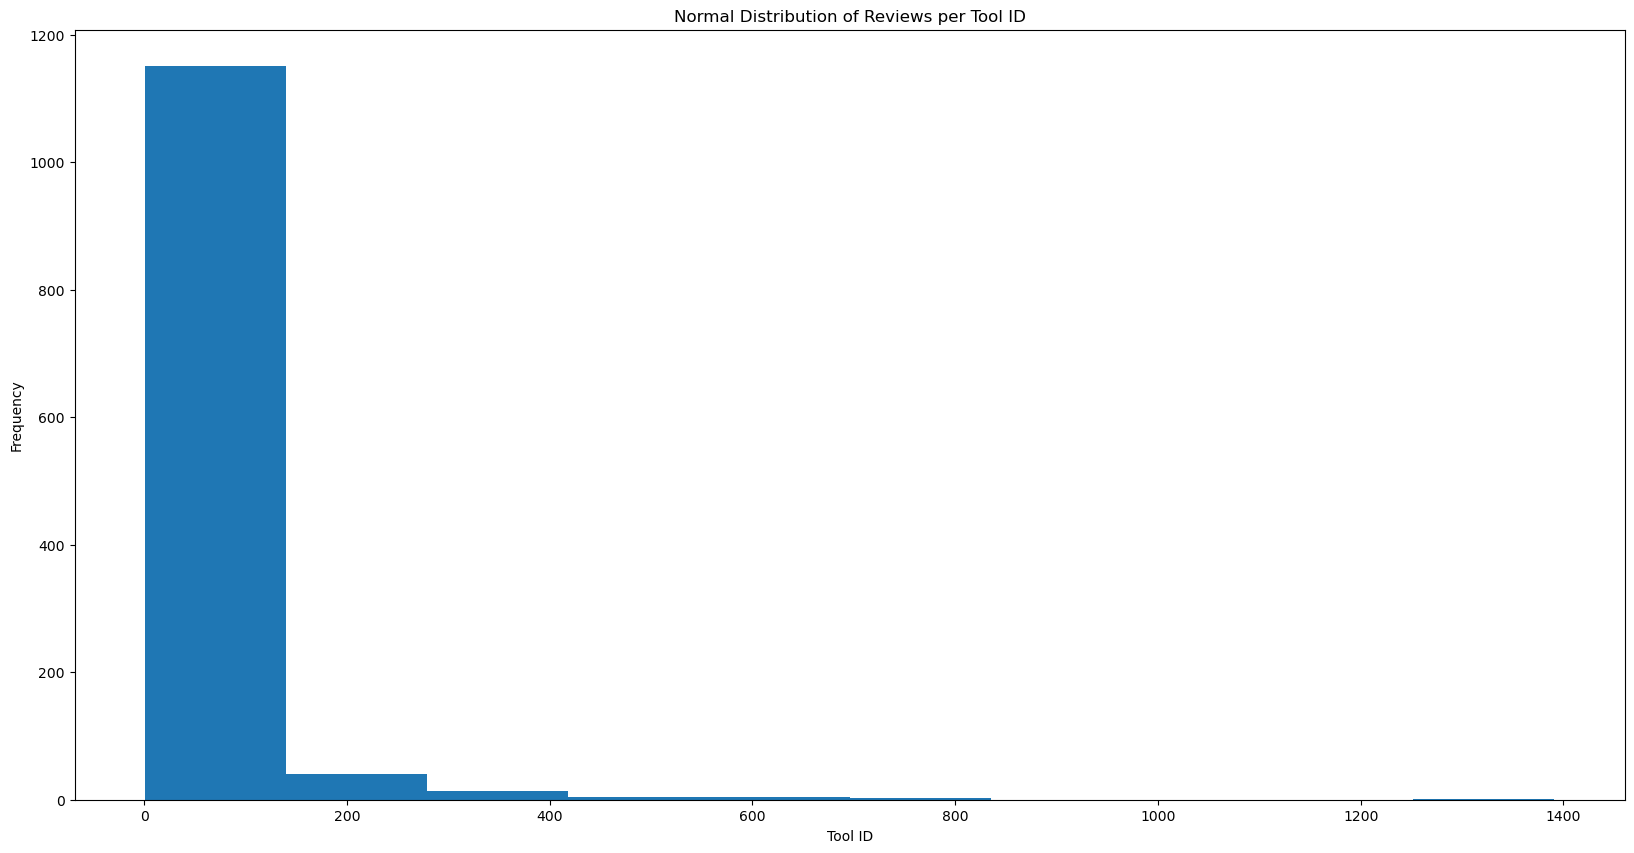

In [ ]:
import matplotlib.pyplot as plt

merged_df['tool_id'].value_counts().plot(kind='hist', bins=10, figsize=(20, 10))
plt.xlabel('Tool ID')
plt.ylabel('Frequency')
plt.title(' Distribution of Reviews per Tool ID')
plt.show()


In [ ]:
# max reviews per tool id that have integer and print first 10
merged_df['tool_id'].value_counts().head(10)

3137     1391
10177     811
8772      774
5490      664
9329      634
7354      624
8794      623
5351      511
2188      495
5831      484
Name: tool_id, dtype: Int64

In [ ]:
# print tool id 3137 and sample of 30 rows
merged_df[merged_df['tool_id'] == 8772].sample(30)

,tool_id,review_id,review_text,review_date,user_info_name,user_info,helpful_count,all_time_score,amount_of_reviews,tool_link,recent_review_score,recent_reviews_amount,url_format
36393,8772,review-197031,NaN,2019-10-18T01:46:54-07:00,Pramod George ⭐⭐⭐⭐⭐,/@thepramodgeorge,0,4.8,41.0,https://icons8.com?ref=producthunt,4.8,5.0,icons8.com
36253,8772,review-307426,NaN,2020-09-03T01:50:47-07:00,Alena Bitton,/@alena_b,0,4.8,41.0,https://icons8.com?ref=producthunt,4.8,5.0,icons8.com
36527,8772,review-253150,NaN,2020-05-01T14:27:18-07:00,Иван Борисов,/@new_user_12264caf2f,0,4.8,41.0,https://icons8.com?ref=producthunt,4.8,5.0,icons8.com
36287,8772,review-353405,NaN,2021-01-01T00:56:36-08:00,Madhav Anand,/@madhav_anand,0,4.8,41.0,https://icons8.com?ref=producthunt,4.8,5.0,icons8.com
36212,8772,review-373124,You've just opened a new universe!,2021-02-18T00:18:23-08:00,Pablo Fernandez,/@gobak,0,4.8,41.0,https://icons8.com?ref=producthunt,4.8,5.0,icons8.com
36038,8772,review-126697,Finally someone made a collection that i'm not...,2018-12-19T01:39:35-08:00,Artem Tarasov,/@taragraphy,0,4.8,41.0,https://icons8.com?ref=producthunt,4.8,5.0,icons8.com
42796,8772,review-630201,"Just a few little things, make plugin great ag...",2023-06-14T18:21:07-07:00,Muhammad Jayadi Anwar,/@muhajaya,1,4.9,94.0,https://icons8.com/lunacy?ref=producthunt,4.9,10.0,icons8.com
42825,8772,review-541145,NaN,2022-09-23T14:12:27-07:00,Erica Straub,/@ericamadly,2,4.9,94.0,https://icons8.com/lunacy?ref=producthunt,4.9,10.0,icons8.com
36216,8772,review-434491,NaN,2021-07-29T06:04:59-07:00,Pablo Fernandez,/@gobak,0,4.8,41.0,https://icons8.com?ref=producthunt,4.8,5.0,icons8.com
36145,8772,review-320043,NaN,2020-09-24T08:06:52-07:00,Luba Zee,/@luba_zee,0,4.8,41.0,https://icons8.com?ref=producthunt,4.8,5.0,icons8.com


In [ ]:
# count amount of duplicates merged_df[merged_df['tool_id'] == 8772] in review id
merged_df[merged_df['tool_id'] == 8772]['review_id'].duplicated().sum()

0

In [ ]:
#merged_df and df tool id to int if NaN dont change
df['tool_id'] = df['tool_id'].astype('Int64')


In [ ]:
# merge merged_df and df on tool_id and if there is no match, keep all rows from both dataframes
merged_df = pd.merge(merged_df, df, on='tool_id', how='outer')

In [ ]:
merged_df.shape

(60058, 81)

In [ ]:
#search for midjourney in merged_df
merged_df[merged_df['website link'] == 'www.midjourney.com']

#now count complete rows of midjourney in merged_df
merged_df[merged_df['website link'] == 'www.midjourney.com'].count()

tool_id                    74
review_id                  74
review_text                73
review_date                74
user_info_name             74
                           ..
use case                   74
type of output modality    74
type of data origin        74
freemium                    0
fuzzy_match_score          74
Length: 81, dtype: int64

In [ ]:
#how many rows have filled use case
merged_df['use case'].notnull().sum()

#and how many of that have filled use case and filled description
merged_df[['use case', 'description']].notnull().all(axis=1).sum()

#and how many of that have filled use case and filled description and filled average visits
merged_df[['use case', 'description', 'average visits']].notnull().all(axis=1).sum()

#and how many of that have filled use case and filled description and filled average visits and filled total funding amount
merged_df[['use case', 'description', 'average visits', 'total_funding_amount']].notnull().all(axis=1).sum()

#and how many of that have filled use case and filled description and filled average visits and filled total funding amount and filled price
merged_df[['use case', 'description', 'average visits', 'total_funding_amount', 'price']].notnull().all(axis=1).sum()

#and how many of that have filled use case and filled description and filled average visits and filled total funding amount and filled price and tool id
merged_df[['use case', 'description', 'average visits', 'total_funding_amount', 'price', 'tool_id']].notnull().all(axis=1).sum() 

#how many unqie tool id are in this: merged_df[['use case', 'description', 'average visits', 'total_funding_amount', 'price', 'tool_id']].notnull().all(axis=1).sum() 
merged_df[['average visits', 'total_funding_amount', 'price', 'tool_id']].notnull().all(axis=1).sum()

13381

In [ ]:
import pandas as pd

# Voorbeeld DataFrame
# merged_df = pd.read_csv('je_merged_dataframe.csv')

# Filter de DataFrame voor rijen waar alle gespecificeerde kolommen niet-null waarden bevatten
filtered_df = merged_df[['description', 'average visits', 'total_funding_amount', 'price', 'tool_id']].dropna()

# Tel het aantal unieke 'tool_id' waarden in de gefilterde DataFrame
unique_tool_ids_count = filtered_df['tool_id'].nunique()

print(f"Aantal unieke tool ID's met complete informatie: {unique_tool_ids_count}")


Aantal unieke tool ID's met complete informatie: 636


In [ ]:
#final dataframe sample
merged_df.sample(30)

,tool_id,review_id,review_text,review_date,user_info_name,user_info,helpful_count,all_time_score,amount_of_reviews,tool_link,...,website link,product description,business unit,vertical,application type,use case,type of output modality,type of data origin,freemium,fuzzy_match_score
19039,9253,review-205703,not sure what to do with this,2019-11-21T03:13:13-08:00,Randal Walker,/@randalwalker,0,4.2,0.0,http://www.pixelvibe.com?ref=producthunt,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1703,<NA>,review-558142,Its okey product,2022-12-12T07:42:24-08:00,Javi Furio,/@javi_furio,1,4.7,336.0,https://bit.ly/3d4lSpN?ref=producthunt,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53893,1349,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24528,5490,review-351236,NaN,2020-12-23T02:26:06-08:00,Jess Faccin,/@jess_faccin,0,4.8,444.0,https://canva.com?ref=producthunt,...,http://www.canva.com/,Canva is an online design and publishing tool ...,Generic,Generic,End-User Applications,Productivity- Designers and Creatives,Image,Combined,Yes,60.0
58627,9891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50145,17,review-674631,Very nice interface! I searched for 2-3 destin...,2023-09-14T00:40:47-07:00,Kypros Ioannou,/@kypros_ioannou,1,5,2.0,https://travelnaut.com?ref=producthunt,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2928,<NA>,review-592729,Awesome project,2023-03-18T09:37:45-07:00,Ahmadreza Akbari,/@ahmadreza_akbari,0,4.9,NaN,https://www.ChainGPT.org?ref=producthunt,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38731,6819,review-644857,It’s great!,2023-07-11T14:49:15-07:00,John Vandivier,/@john_vandivier,0,4.9,126.0,https://www.opus.pro?ref=producthunt,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45854,1758,review-480005,NaN,2021-12-02T00:33:05-08:00,Rée De la Rosa,/@ree_de_la_rosa,0,4.9,18.0,https://rows.com?ref=producthunt,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54896,1467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Joining the tables for Tool ID

In [ ]:
from fuzzywuzzy import fuzz 
from fuzzywuzzy import process 

In [ ]:
def get_highest_fuzzy_score(url, urls_series):
    return max(urls_series.apply(lambda x: fuzz.ratio(url, x)))

In [ ]:
pivot_df['fuzzy_match_score'] = pivot_df['urls'].apply(lambda x: get_highest_fuzzy_score(x, df['url_format']))

In [ ]:
df_ga['fuzzy_match_score'] = df_ga['website link'].apply(lambda x: get_highest_fuzzy_score(x, df_traffic['urls']))

In [ ]:
df_ga['fuzzy_match_score'] = df_ga['url_format'].apply(lambda x: get_highest_fuzzy_score(x, df['url_format']))

In [ ]:
#look for duplicates in the pivot_df in the traffic data for a part of the url
pivot_df[pivot_df['urls'].str.contains('elicit')]

In [ ]:
# check in every dataframe how many fuzzy match scores are above 99

#df['fuzzy_match_score'].value_counts()[df['fuzzy_match_score'].value_counts() > 99].sum()

pivot_df['fuzzy_match_score'].value_counts()[pivot_df['fuzzy_match_score'].value_counts() > 99].sum()

#df_ga['fuzzy_match_score'].value_counts()[df_ga['fuzzy_match_score'].value_counts() > 99].sum()

df_financial['fuzzy_match_score'].value_counts()[df_financial['fuzzy_match_score'].value_counts() == 99].sum()

In [ ]:
# url format in dataframes
urls_pivot_df = set(pivot_df['urls'].unique())
urls_df = set(df['url_format'].unique())
urls_df_financial = set(df_financial['url_format'].unique())

# same urls in all dataframes
common_urls_all = urls_pivot_df.intersection(urls_df, urls_df_financial)

# same url in pivot_df and df_financial
common_urls_pivot_financial = urls_pivot_df.intersection(urls_df_financial)

# same url in pivot_df and df
common_urls_pivot_df = urls_pivot_df.intersection(urls_df)

# same url in df_financial and df
common_urls_financial_df = urls_df_financial.intersection(urls_df)


# same urls in all dataframes
number_of_common_urls_all = len(common_urls_all)
number_of_common_urls_pivot_financial = len(common_urls_pivot_financial)
number_of_common_urls_pivot_df = len(common_urls_pivot_df)
number_of_common_urls_financial_df = len(common_urls_financial_df)

# print the results
print(f"same urls in all dfs is: {number_of_common_urls_all}")
print(f" same urls in in financial and df_ga {number_of_common_urls_pivot_financial}")
print(f"same urls in pivot and financial is: {number_of_common_urls_pivot_df}")
print(f"same urls in df and financial is: {number_of_common_urls_financial_df}")


# for db